# spaCy et analyses NLP

https://spacy.io/models/fr#fr_core_news_lg

L'objectif ici est d'analyser les Tweets publiés par Trump

## Installation et import des modules spaCy

In [ ]:
!python -m spacy download en_core_web_lg

In [2]:
import spacy
import en_core_web_sm

nlp = en_core_web_sm.load()

## Lecture du fichier de Tweets

In [3]:
import pandas as pd

tweets = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Cours BD/Séance 4 - DL - NLP/Trump_tweets.csv")
len(tweets)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


328053

In [4]:
tweets.head(5)

,Unnamed: 0,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,0,Twitter for iPhone,Over 90% approval rating for your all time fav...,Mon Aug 27 00:39:38 +0000 2018,27040,106838.0,False,1.033877e+18
1,1,Twitter for iPhone,“Mainstream Media tries to rewrite history to ...,Sun Aug 26 22:01:33 +0000 2018,21346,76682.0,False,1.033837e+18
2,2,Twitter for iPhone,Fantastic numbers on consumer spending release...,Sun Aug 26 14:31:06 +0000 2018,18960,87334.0,False,1.033724e+18
3,3,Twitter for iPhone,"...And it will get, as I have always said, muc...",Sun Aug 26 14:27:16 +0000 2018,14963,62956.0,False,1.033723e+18
4,4,Twitter for iPhone,RT @realDonaldTrump: Social Media Giants are s...,Sun Aug 26 14:25:47 +0000 2018,50142,0.0,True,1.033722e+18


## Name Entity Recognition

In [ ]:
sent = tweets['text'][0]
doc = nlp(sent)

# style : ent or dep
spacy.displacy.render(doc, style='ent', jupyter=True)

In [ ]:
sent = tweets['text'][100]
doc = nlp(sent)

spacy.displacy.render(doc, style='ent', jupyter=True)

In [ ]:
sent = tweets['text'][450]
doc = nlp(sent)

spacy.displacy.render(doc, style='ent', jupyter=True)

In [ ]:
# replace by Mr
sent = tweets['text'][450].replace('W.H.', '')
doc = nlp(sent)

spacy.displacy.render(doc, style='ent', jupyter=True)

## Part of Speech Tager (POS)

Afficher pour chaque mot du Tweet 450 : le mot en lui-même, le radical (lemmatisation), le tag, la forme, si c'est un caractère alphanumétique (booléen), et si c'est un stop words (booléen)

In [5]:
sent = tweets['text'][450]
doc = nlp(sent)

arr = []

for token in doc:
  arr.append([token.text, token.lemma_, token.pos_, token.tag_, token.shape_, token.is_alpha, token.is_stop])

pd.DataFrame(arr, columns=['word', 'lemma', 'pos', 'tag', 'shape', 'is_alpha', 'is_stop']).head(20)

,word,lemma,pos,tag,shape,is_alpha,is_stop
0,The,the,DET,DT,Xxx,True,True
1,Rigged,Rigged,PROPN,NNP,Xxxxx,True,False
2,Witch,Witch,PROPN,NNP,Xxxxx,True,False
3,Hunt,Hunt,PROPN,NNP,Xxxx,True,False
4,",",",",PUNCT,",",",",False,False
5,headed,head,VERB,VBN,xxxx,True,False
6,by,by,ADP,IN,xx,True,True
7,the,the,DET,DT,xxx,True,True
8,13,13,NUM,CD,dd,False,False
9,Angry,angry,ADJ,JJ,Xxxxx,True,False


## Récupération des 100 000 premiers "mots"   

spaCy n'analyse pas au delà de cette limite

In [13]:
text = tweets['text'].str.cat(sep=' ')
text = text[:100000]

doc = nlp(text)

noun = list(doc.noun_chunks)
noun = [str(x) for x in noun]

## Afficher les 15 noms les plus cités

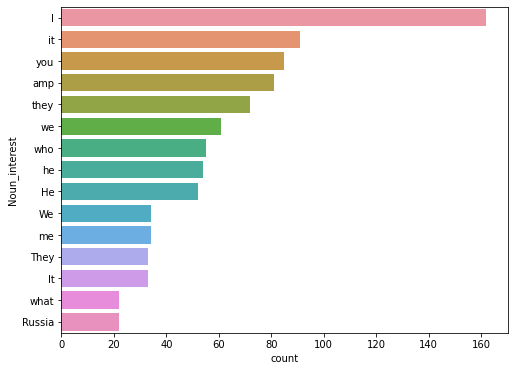

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

df_nouns = pd.DataFrame(noun, columns=["Noun_interest"])

plt.figure(figsize=(8,6))
sns.countplot(y="Noun_interest", data=df_nouns, order=df_nouns["Noun_interest"].value_counts().iloc[:15].index)
plt.show()

## Afficher les 15 sujets les plus évoqués

Retirer les stop words, conserver que les POS NOUN, et les "mots" supérieurs à 2 charactères

In [17]:
topics = []

for token in doc:
    if (not token.is_stop) and (token.pos_ == "NOUN") and (len(str(token))>2):
        topics.append(str(token))

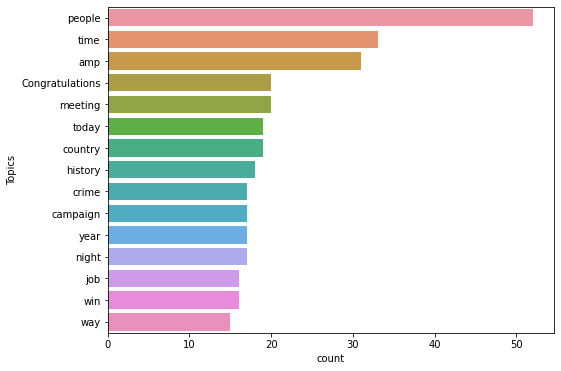

In [18]:
df_topics = pd.DataFrame(topics, columns=["Topics"])

plt.figure(figsize=(8,6))
sns.countplot(y="Topics", data=df_topics, order=df_topics["Topics"].value_counts().iloc[:15].index)
plt.show()

## Afficher les 15 sujets les plus évoqués

Ne conserver que les mots taggés avec un NER, et retirer les classes PERCENT, CARDINAL, DATE

In [19]:
topics_label = []

for ent in doc.ents:
    if ent.label_ not in ["PERCENT", "CARDINAL", "DATE"]:
        topics_label.append(ent.text.strip())

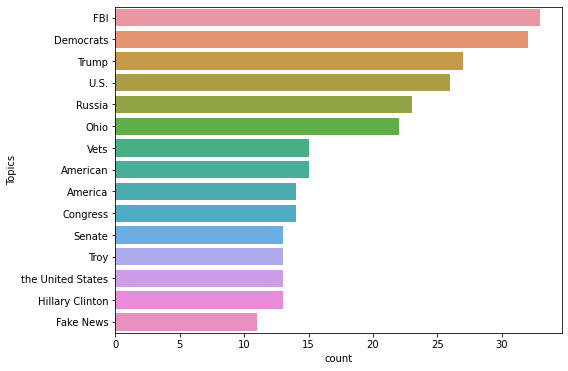

In [20]:
df_topics = pd.DataFrame(topics_label, columns=["Topics"])

plt.figure(figsize=(8,6))
sns.countplot(y="Topics", data=df_topics, order=df_topics["Topics"].value_counts().iloc[:15].index)
plt.show()

## Afficher un Word Cloud 

Prendre les 15 sujets les plus évoqués avec les POS NOUN

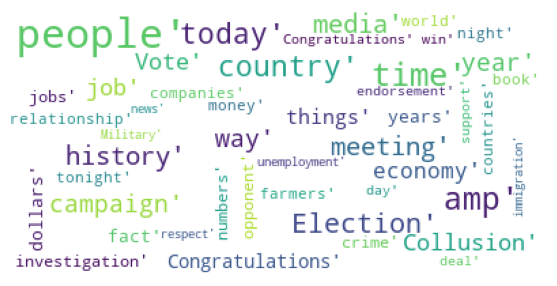

In [21]:
from spacy.lang.en.stop_words import STOP_WORDS
from wordcloud import WordCloud

plt.figure(figsize=(10,5))
wordcloud = WordCloud(background_color="white",
                      stopwords = STOP_WORDS,
                      max_words=45,
                      max_font_size=30,
                      random_state=42
                     ).generate(str(topics))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Analyse de sentiment sur les Tweets

In [ ]:
!pip install spacytextblob

In [26]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
spacy_text_blob = SpacyTextBlob()
nlp.add_pipe(spacy_text_blob)

## Display polarity, subjectivity and assessments

In [27]:
text = 'I had a really horrible day. It was the worst day ever! But every now and then I have a really good day that makes me happy.'
doc = nlp(text)

print('Polarity:', doc._.sentiment.polarity) 
print('Sujectivity:', doc._.sentiment.subjectivity) 
print('Assessments:', doc._.sentiment.assessments)   

Polarity: -0.125
Sujectivity: 0.9
Assessments: [(['really', 'horrible'], -1.0, 1.0, None), (['worst', '!'], -1.0, 1.0, None), (['really', 'good'], 0.7, 0.6000000000000001, None), (['happy'], 0.8, 1.0, None)]


In [28]:
text = 'But every now and then I have a really good day that makes me happy.'
doc = nlp(text)

print('Polarity:', doc._.sentiment.polarity) 
print('Sujectivity:', doc._.sentiment.subjectivity) 
print('Assessments:', doc._.sentiment.assessments)   

Polarity: 0.75
Sujectivity: 0.8
Assessments: [(['really', 'good'], 0.7, 0.6000000000000001, None), (['happy'], 0.8, 1.0, None)]


## Proximité des mots en fonction de deux vecteurs / dimensions (embeddings)

In [ ]:
!pip install whatlies

In [ ]:
!pip install delayed

In [ ]:
!python -m spacy download en_core_web_md

In [ ]:
from whatlies import EmbeddingSet
from whatlies.language import SpacyLanguage
import en_core_web_md

obj = en_core_web_md.load()
lang = SpacyLanguage(obj)

In [ ]:
words = ['cat', 'dog', 'fish', 'kitten', 'man', 'woman', 'king', 'queen', 'doctor', 'nurse']

emb = lang[words]
emb.plot_interactive(x_axis='man', y_axis='woman')

alt.LayerChart(...)

## Afficher le graph sur les mots d'un tweet

Prendre le Tweet 450

In [ ]:
import numpy as np

t = tweets['text'][450]
doc = nlp(t)

arr = []

for t in doc:
  if(len(t)>2 and str(t) not in arr):
    arr.append(str(t))

In [ ]:
emb = lang[arr]
emb.plot_interactive(x_axis='Republican', y_axis='Democrat')

alt.LayerChart(...)